In [ ]:
from google.colab import drive

drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Lennon-McCartney

/content/drive/My Drive/Lennon-McCartney


In [ ]:
ls

 Both/  'John Lennon'/  'Paul McCartney'/


In [ ]:
import os
directory='Both/'
LM=[]
for file in os.listdir(directory):
  path=directory+file
  LM.append(open(path).read().lower())

In [ ]:
directory='John Lennon/'
JL=[]
for file in os.listdir(directory):
  path=directory+file
  JL.append(open(path).read().lower())

In [ ]:
directory='Paul McCartney/'
PM=[]
for file in os.listdir(directory):
  path=directory+file
  PM.append(open(path).read().lower())

print(PM)

['blackbird singing in the dead of night\ntake these broken wings and learn to fly\nall your life\nyou were only waiting for this moment to arise\nblackbird singing in the dead of night\ntake these sunken eyes and learn to see\nall your life\nyou were only waiting for this moment to be free\nblackbird fly, blackbird fly\ninto the light of a dark black night\nblackbird fly, blackbird fly\ninto the light of a dark black night\nblackbird singing in the dead of night\ntake these broken wings and learn to fly\nall your life\nyou were only waiting for this moment to arise\nyou were only waiting for this moment to arise\nyou were only waiting for this moment to arise', "desmond has a barrow in the marketplace\nmolly is the singer in a band\ndesmond says to molly, girl, i like your face\nand molly says this as she takes him by the hand\nob la di, ob-la-da, life goes on, bra\nla-la, how the life goes on\nob-la di, ob-la-da, life goes on, bra\nla-la, how the life goes on\ndesmond takes a trolley

In [ ]:
import re

In [ ]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


In [ ]:
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def tokenswithexpandedcontractions(rawtext,CONTRACTION_MAP):
  def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

  textexpanded=expand_contractions(rawtext)
  tokensexpanded=[word for word in nltk.word_tokenize(textexpanded) if word. isalnum()]
  return tokensexpanded
  

In [ ]:
def tokenswithoutexpandedcontractions(rawtext):
  tokenizer = RegexpTokenizer("[\w]+")
  tokens=tokenizer.tokenize(rawtext)
  return tokens

In [ ]:
def removestopwords(tokens,stop_words):
  tokens=[token for token in tokens if token.isalpha()]
  words=[token for token in tokens if token not in stop_words]
  return words

In [ ]:
tokensLM=[]
for song in LM:
  tokensLM.append(removestopwords(tokenswithexpandedcontractions(song,CONTRACTION_MAP),stop_words))
  # tokensLM.append(tokenswithexpandedcontractions(song,CONTRACTION_MAP))

  # tokensLM.append(removestopwords(tokenswithoutexpandedcontractions(song),stop_words))

print(tokensLM)

tokensPM=[]
for song in PM:
  tokensPM.append(removestopwords(tokenswithexpandedcontractions(song,CONTRACTION_MAP),stop_words))
  # tokensPM.append(tokenswithexpandedcontractions(song,CONTRACTION_MAP))

  # tokensPM.append(removestopwords(tokenswithoutexpandedcontractions(song),stop_words))

print(tokensPM)

tokensJL=[]
for song in JL:
  tokensJL.append(removestopwords(tokenswithexpandedcontractions(song,CONTRACTION_MAP),stop_words))
  # tokensJL.append(tokenswithexpandedcontractions(song,CONTRACTION_MAP))

  # tokensJL.append(removestopwords(tokenswithoutexpandedcontractions(song),stop_words))

print(tokensJL)
  

[['even', 'though', 'may', 'singing', 'movin', 'along', 'trying', 'get', 'bottom', 'goes', 'extra', 'first', 'one', 'going', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'well', 'woo', 'woo', 'woo', 'woo', 'woo', 'woo', 'woo', 'helter', 'skelter', 'take', 'seventeen', 'one', 'two', 'three', 'four', 'get', 'bottom', 'go', 'back', 'top', 'hill', 'stop', 'turn', 'give', 'thrill', 'til', 'get', 'bottom', 'see', 'yeah', 'yeah', 'well', 'want', 'love', 'coming', 'fast', 'miles', 'tell', 'tell', 'tell', 'tell', 'answer', 'may', 'lover', 'dancer', 'oh', 'look', 'helter', 'skelter', 'helter', 'skelter', 'helter', 'skelter', 'woo', 'well', 'want', 'make', 'coming', 'fast', 'let', 'break', 'well', 'tell', 'tell', 'tell', 'answer', 'may', 'lover', 'dancer', 'woo', 'look', 'helter', 'skelter', 'helter', 'skelter', 'helter', 'skelter', 'helter', 'skelter', 'woo', 'woo', 'woo', 'woo', 'woo', 'woo', 'woo', 'woo', 'ooh', 'woo', 'ooh', 'woo', 'woo', 'woo', 'woo', 'woo', 'woo', 'woo', 'well', 'goin', 

In [ ]:
print(len(tokensJL))
print(len(tokensPM))

89
82


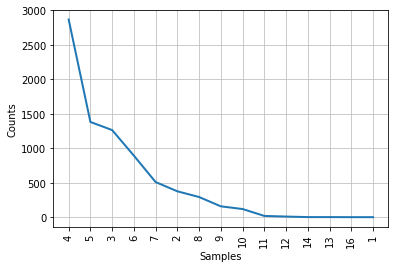

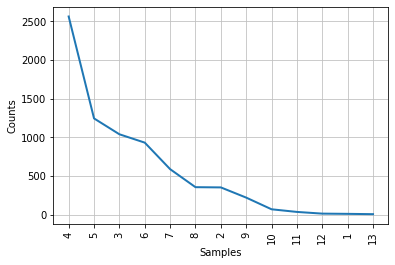

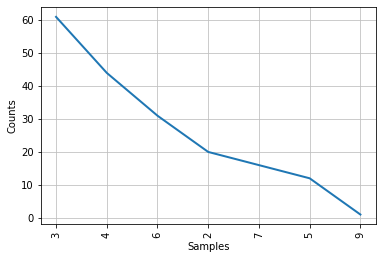

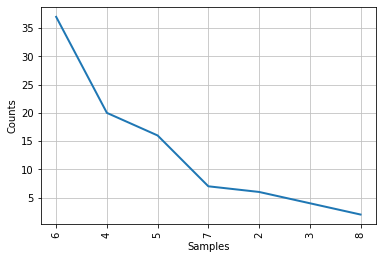

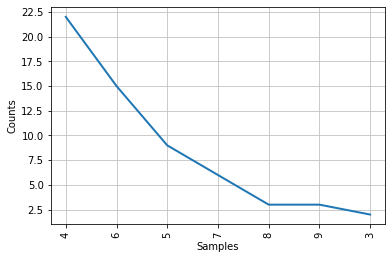

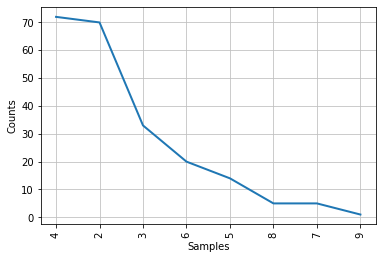

[3, 4, 10, 4, 4, 4, 6, 5, 4, 9, 4, 4, 4, 6, 5, 4, 11, 4, 5, 4, 3, 2, 5, 5, 5, 3, 3, 4, 8, 4, 4, 5, 4, 3, 4, 3, 12, 4, 4, 4, 5, 6, 5, 4, 4, 7, 4, 4, 3, 2, 5, 5, 5, 3, 6, 12, 4, 4, 4, 6, 4, 4, 11, 4, 4, 6, 4, 4, 7, 2, 8, 8, 8, 3, 5, 4, 6, 6, 4, 3, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 7, 6, 10, 6, 4, 10, 6, 4, 10, 6, 4, 4, 4, 5, 4, 4, 4, 5, 5, 8, 4, 10, 6, 4, 10, 6, 4, 10, 6, 4, 4, 4, 5, 4, 4, 4, 3, 4, 8, 5, 10, 6, 4, 10, 6, 4, 10, 6, 4, 4, 4, 5, 4, 4, 4, 3, 4, 8, 5, 10, 6, 4, 10, 6, 4, 10, 6, 4, 4, 4, 5, 4, 7, 6, 10, 6, 4, 10, 6, 4, 10, 6, 4, 4, 5, 4, 8, 4, 2, 5, 4, 2, 5, 6, 6, 5, 4, 6, 4, 8, 4, 6, 2, 4, 5, 2, 9, 5, 5, 6, 5, 5, 6, 4, 3, 4, 5, 4, 5, 5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 4, 5, 4, 4, 5, 5, 5, 4, 6, 5, 4, 5, 5, 5, 5, 5, 6, 5, 5, 6, 4, 3, 4, 5, 4, 5, 5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 5, 6, 5, 5, 6, 3, 4, 3, 4, 6, 4, 3, 6, 4, 6, 4, 8, 7, 7, 9, 5, 5, 6, 7, 5, 8, 4, 3, 4, 3, 4, 6, 4, 3, 6, 4, 6, 3, 4, 3, 4, 6, 7, 7, 6, 4, 4, 5, 8, 8, 8, 9, 7, 3, 4, 3, 4, 6, 4, 3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# fig,axs=plt.subplots(1,2,figsize=(10,30))
# i=0
# j=0
# n_bins=10
X=[]
hmm=[]
J=[]
for tokenset in tokensJL:

  token_lengths = [len(token) for token in tokenset]
  for k in tokenset:
    J.append(len(k))
  # length_distributions = nltk.FreqDist(token_lengths)
  # length_distributions.plot(ax=axs[i])
  x ,y  = np.unique(token_lengths, return_counts=True)
  y1=[ele/sum(y) for ele in y]
  X.append(y1)
  hmm.append(x)

#   axs[j][i].plot(x,y1)
#   axs[j][i].grid(True)
length_distributions = nltk.FreqDist(J)
length_distributions.plot()
#   j+=1
# i+=1
# j=0
P=[]
for tokenset in tokensPM:

  token_lengths = [len(token) for token in tokenset]
  # length_distributions = nltk.FreqDist(token_lengths)
  # length_distributions.plot(ax=axs[i])
  for k in tokenset:
    P.append(len(k))
  x ,y  = np.unique(token_lengths, return_counts=True)
  y1=[ele/sum(y) for ele in y]
  X.append(y1)
  hmm.append(x)
  # axs[j][i].plot(x,y1)
  # axs[j][i].grid(True)
length_distributions = nltk.FreqDist(P)
length_distributions.plot()
  # j+=1
# j=0
# i+=1
for tokenset in tokensLM:

  token_lengths = [len(token) for token in tokenset]
  length_distributions = nltk.FreqDist(token_lengths)
  length_distributions.plot()
  x ,y  = np.unique(token_lengths, return_counts=True)
  y1=[ele/sum(y) for ele in y]
  X.append(y1)
  hmm.append(x)
#   axs[j][i].plot(x,y1)
#   axs[j][i].grid(True)

#   j+=1
print(J)



In [ ]:
for ele in hmm:
  print(ele)

[ 2  3  4  5  6  7  8  9 10 11 12]
[ 3  4  5  6  7  8 10]
[2 3 4 5 6 8 9]
[3 4 5 6 7 8 9]
[ 3  4  5  6  7  8 10]
[2 3 4 5 6 7 8]
[ 3  4  5  6  8  9 10]
[ 2  3  4  5  6  7  8 10]
[ 2  3  4  5  6  7  8  9 10 12]
[ 3  4  5  6  7  8  9 10]
[2 3 4 5 6 7 8 9]
[ 3  4  5  6  7  8 10 11]
[2 3 4 5 7 8 9]
[3 4 5 7]
[ 2  3  4  5  6  7  8  9 10]
[2 3 4 5 6 7 8 9]
[3 4 5 6 7 9]
[ 3  4  5  7  9 12]
[2 3 4 5]
[ 2  3  4  5  6  7  8  9 10]
[ 2  3  4  5  6  7  8  9 10]
[2 3 4 5 6 7]
[2 3 4 5 6 7 8 9]
[2 3 4 5 6 7]
[3 4 5 6 7]
[ 2  3  4  5  6  7  8  9 10]
[2 3 4 5 6 7]
[ 3  4  5  6  8 11]
[ 2  3  4  5  6  7  8  9 10 16]
[2 3 4 5 6 7 8]
[ 2  3  4  5  6  7  8  9 10 11 12]
[2 3 4 5 6 7 8 9]
[ 2  3  4  5  6  7  8  9 10]
[ 3  4  5  6 10]
[ 3  4  5  6  7  8  9 10]
[3 4 5 6 7 8 9]
[ 3  4  5  6  7  9 10 11]
[ 3  4  5  6  7  8 10]
[ 2  3  4  5  6  7  8 10]
[ 1  3  4  5  6  7  8  9 10 11]
[ 2  3  4  5  6  7  8  9 10 11 12]
[ 2  3  4  5  6  7  8  9 10 11 12]
[2 3 4 5 6 7 8]
[3 4 5 6 7 8 9]
[ 2  3  4  5  6 11]
[ 2  3

In [ ]:
# X[0].append(0)
# X[2].append(0)
# X[10].append(0)
Z=[]
for ele in hmm:
  z=[]
  for i in range(2,17):
    if(i in ele): 
      z.append(1)
    else:
      z.append(0)
  Z.append(z)
print(len(Z))

  

175


In [ ]:

for i in range(175):
  j=0
  for ele in hmm[i]:
    Z[i][ele-2]=X[i][j]
    j+=1
  


In [ ]:
Z

[[0.043478260869565216,
  0.10869565217391304,
  0.3695652173913043,
  0.2608695652173913,
  0.08695652173913043,
  0.021739130434782608,
  0.043478260869565216,
  0.010869565217391304,
  0.010869565217391304,
  0.021739130434782608,
  0.021739130434782608,
  0,
  0,
  0,
  0],
 [0,
  0.022988505747126436,
  0.4482758620689655,
  0.10344827586206896,
  0.19540229885057472,
  0.022988505747126436,
  0.034482758620689655,
  0,
  0.1724137931034483,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.043010752688172046,
  0.043010752688172046,
  0.22580645161290322,
  0.5161290322580645,
  0.13978494623655913,
  0,
  0.021505376344086023,
  0.010752688172043012,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0.2714285714285714,
  0.30714285714285716,
  0.05714285714285714,
  0.2,
  0.07142857142857142,
  0.07142857142857142,
  0.02142857142857143,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0.18181818181818182,
  0.29545454545454547,
  0.32954545454545453,
  0.022727272727272728,
  0.07954545454545454,
  0.068

In [ ]:
labels=[]
for _ in range(89):
  labels.append(1)

for _ in range(82):
  labels.append(2)

for _ in range(4):
  labels.append(3)

Y=np.array(labels)


In [ ]:
Xvals=np.array(Z)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

from sklearn.preprocessing import LabelEncoder 

labelencoder_y = LabelEncoder() 
Y1 = labelencoder_y.fit_transform(Y) 
print(Y1)
classifier=RandomForestClassifier() 
classifier=classifier.fit(Xvals[:171],Y1[:171]) 
predicted=classifier.predict(Xvals[171:]) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2]


In [ ]:
print(predicted)

[0 1 1 0]


In [ ]:
!pip install lime

In [ ]:
import lime
import lime.lime_tabular
feature_names=['Length1','Length2','Length3','Length4','Length5','Length6','Length7','Length8','Length9','Length10','Length11','Length12','Length13','Length14','Length15','Length16']

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(Xvals[:171],feature_names = feature_names,
                                                   class_names=['John_Lennon','Paul_McCartney'],
                                                   kernel_width=5)

In [ ]:
choosen_instance = Xvals[102]
predict_fn_rf = lambda x: classifier.predict_proba(x).astype(float)
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=12)
exp.show_in_notebook(show_all=False)